# 📊 Sentiment Analysis Final Project

---

## 🎯 Project Overview

Welcome to your Sentiment Analysis final project! In this project, you will:

- 🔍 **Analyze** customer reviews or social media text data
- 🧹 **Preprocess** text data using NLP techniques
- 🤖 **Build** and compare multiple classification models
- 📈 **Evaluate** model performance using appropriate metrics
- 💼 **Communicate** findings in a business context

---

## 📋 Project Requirements

- **Dataset**: Use a public sentiment dataset (e.g., IMDb reviews, Amazon reviews, airline tweets)
- **Models**: Train at least **2 different classification models**
- **Evaluation**: Use multiple metrics (accuracy, precision, recall, confusion matrix)
- **Documentation**: Use markdown cells to explain your approach, findings, and insights

---

## 💡 Important Tips for Success

### Working with Limited Resources
- ⚡ **Start small**: Use `df.sample(n=1000)` or `df.head(5000)` to work with a subset
- 🎯 **Limit vocabulary**: Use `max_features=5000` in TfidfVectorizer
- 🚀 **Choose efficient models**: LogisticRegression and MultinomialNB are fast and effective
- 💾 **Save your work frequently**: Use Ctrl+S or Cmd+S often

### Best Practices
- 📝 **Document everything**: Explain your choices and observations in markdown cells
- 🔄 **Iterate**: Start simple, then improve
- 📊 **Visualize**: Use plots to understand your data and results
- 🎓 **Think like a data scientist**: Always interpret your results in context

---

Let's get started! 🚀

---

# Part 1: Project Definition 🎯

## Objectives
- Define the business problem you're solving
The business problem I am tying to solve is to monitor customer feedback and automatically categorize them into sentiments like
Neutral, Positive or Negative so that customer service representatives can prioritize negative comments for immediate solution. 
This will help Airline Companies customer loyalty and prevent business fall out.

- Describe your chosen dataset
The dataset I chosed for this projects is "Tweets.csv." 
This is a popular dataset on Kaggle that has comments on popular airlines. 
These comments are gathered from Tweets made by customers who has a first-hand experience of the particular flight operator.
This is a Multi-class type of label, having targets (Neutral, Negative, Positive).
The text in the dataset represents tweets
There are 14,640 records in the dataset with 15 columns

- Explain why sentiment analysis is valuable for this use case
Sentiment analysis is incredibly valuable in this use case because the it will provide a model for prioritizing customer feedback.
It will also help identify issues from root cause, such as late flight and poor customer service.
Also its value is aparent in launching campaigns that target changing public opinion and improving reputation

## Instructions

In the markdown cell below, answer these questions:

1. **What is the business problem?**
   - What decision or insight will this sentiment analysis support?
   - Who would use these results?

2. **What dataset are you using?**
   - Name and source of the dataset
   - Number of samples
   - What the text represents (reviews, tweets, comments, etc.)
   - What are the sentiment labels (positive/negative, star ratings, etc.)?

3. **Why is this problem important?**
   - How could the results be used in real-world scenarios?

---

## 📝 Your Project Definition

**Business Problem:**

*The core business problem is to rapidly monitor custotmer feedbaack to improve business reputation*

---

**Dataset Description:**

*[Write your answer here]*

- **Dataset name**: U.S. Airline Twitter Sentiment
- **Source**: Kaggle
- **Number of samples**: 14,640
- **Text type**: Tweets (short-form social media text, including mentions and hashtags)
- **Sentiment labels**: Multi-class (Negative, Neutral, Positive) 

---

**Importance and Real-World Applications:**

**This model is critical for service improvement and real-time customer feedback management**

---

# Part 2: Exploratory Data Analysis (EDA) 🔍

## Objectives
- Load and examine your dataset
- Understand the distribution of sentiments
- Analyze text characteristics (length, common words, etc.)
- Identify any data quality issues

## What to Explore

✅ **Dataset structure**: Shape, columns, data types

✅ **Missing values**: Check for and handle missing data

✅ **Class distribution**: Are sentiments balanced?

✅ **Text length**: Average, min, max review lengths

✅ **Common words**: Most frequent words per sentiment

✅ **Sample reviews**: Display examples from each class

---

## 💡 Tips
- Use `.info()`, `.describe()`, and `.value_counts()` for quick insights
- Visualize distributions with bar plots and histograms
- Look for imbalanced classes that might affect model performance
- Create a word cloud to visualize common terms (optional but impressive!)

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [ ]:
# Load your dataset
# Example: df = pd.read_csv('your_dataset.csv')
# For large datasets, consider using nrows parameter: pd.read_csv('file.csv', nrows=10000)

# YOUR CODE HERE
import os
df = pd.read_csv('Tweets.csv', nrows=10000) # Replace with your data loading code

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(df.describe())

#
print('Total Sentiments per Label', df['airline_sentiment'].value_counts(), end="\n")
#print(df['airline_sentiment']=='Neutral')

Dataset shape: (10000, 15)

Column names: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']
           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.000000e+04                  10000.000000                6738.000000   
mean   5.691262e+17                      0.891200                   0.616211   
std    7.817143e+14                      0.167601                   0.336763   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.684695e+17                      0.684775                   0.354100   
50%    5.692533e+17                      1.000000                   0.666950   
75%    5.698414e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.00

In [39]:
# Check for missing values
# YOUR CODE HERE

# Looking up on missing values
print("***Missing Values***")
print("**" * 10)
print(df.isnull().sum())

# Hint: Use df.isnull().sum() or df.info()

***Missing Values***
********************
tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  4241
negativereason_confidence       3262
airline                            0
airline_sentiment_gold          9977
name                               0
negativereason_gold             9981
retweet_count                      0
text                               0
tweet_coord                     9266
tweet_created                      0
tweet_location                  3160
user_timezone                   3181
dtype: int64


In [ ]:
# 🎯 IMPORTANT: If working with limited resources, sample your data here
# Uncomment and modify as needed:

# df_sample = df.sample(n=5000, random_state=42)
# print(f"Working with {len(df_sample)} samples")
# df = df_sample  # Use the sample for the rest of the project

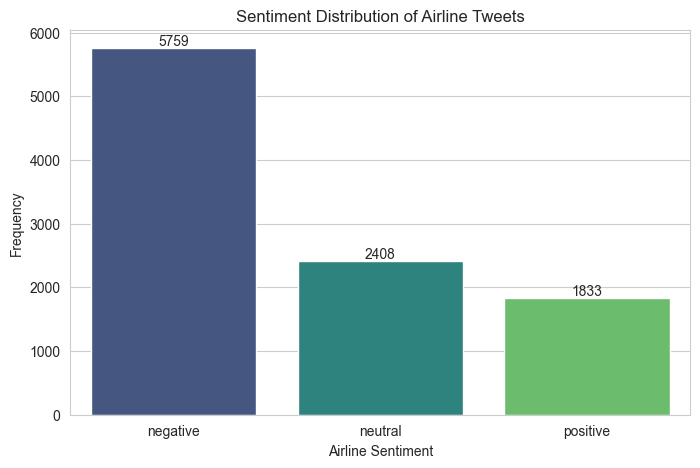

In [88]:
# Analyze sentiment distribution

sentiment_counts = df['airline_sentiment'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.xlabel("Airline Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Distribution of Airline Tweets")
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count,  str(count), ha="center", va="bottom")

# Calculate Percentage
number_of_sentiments = df['airline_sentiment'].count()



# Hint: Use df['sentiment_column'].value_counts()
# Create a bar plot to visualize the distribution

### 📊 Interpretation: Class Balance

*Write your observations here:*
- Are the classes balanced or imbalanced?
No, the classes are imbalanced. Negative sentiments are more than half of the entire dataset.
Positive and Neutral Sentiments are the monority classes of the dataset.

- If imbalanced, how might this affect your model?
This might cause a very high bias towards Negative sentiments. It may achieve high accuracy by blindly guessing more negatives.
However, the Recall and precision will be very poor.

- What could you do to address imbalance?
To address this issue, I can decide to prioritize other metrics like precision, recall and f1 score instead fo depending on accuracy score.
Also, I can oversample the minority classes or undersample the majority class to achieve a balance.

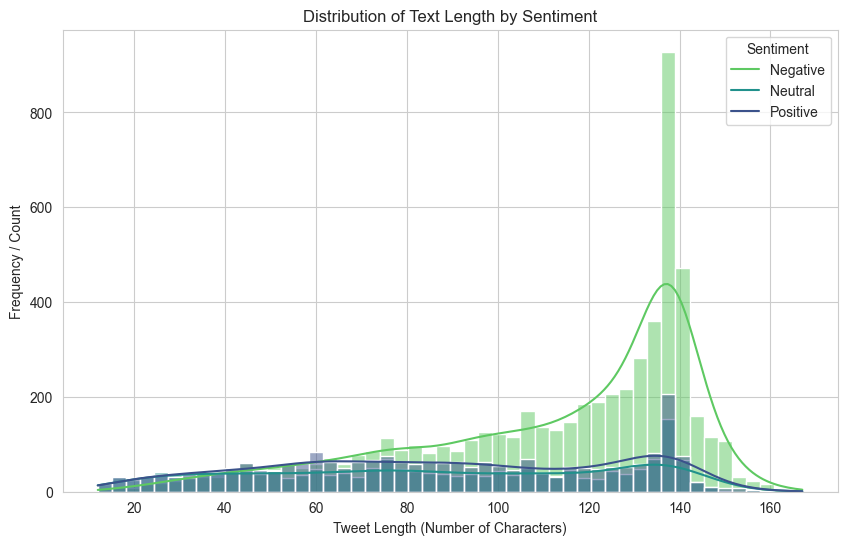


Text Length Descriptive Statistics:
count    10000.000000
mean       101.610200
std         36.776469
min         12.000000
25%         73.000000
50%        111.000000
75%        135.000000
max        167.000000
Name: text_length, dtype: float64


In [105]:
# Analyze text length distribution
# YOUR CODE HERE

# Hint: Create a new column for text length

df['text_length'] = df['text'].str.len()
# df['text_length'] = df['text_column'].str.len()

# Plot histogram of text lengths
plt.figure(figsize=(10,6))
sns.histplot(df, x='text_length', bins=50, kde=True, palette='viridis', hue='airline_sentiment')
plt.xlabel("Tweet Length (Number of Characters)")
plt.ylabel("Frequency / Count")
plt.title("Distribution of Text Length by Sentiment")
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
# Compare lengths across different sentiments
plt.show()

print("\nText Length Descriptive Statistics:")
print(df['text_length'].describe())


### 📊 Interpretation: Text Length

*Write your observations here:*
- What's the average text length?
The average Text Length is approximately 101.61
- Are there differences in length between positive and negative reviews?
The negative sentiments seems to have a slightly wider and more uniform distribution towards the max length. Aside that, it seems to be heavily overlapping.
- Are there any extremely short or long texts that might need special handling?
No, because looking at the statistics, the mininmun and maximum text lenghts are 12 and 167 respectively. This seems normal for tweets

In [113]:
# Display sample reviews from each sentiment class
# YOUR CODE HERE
cols = ['text', 'airline_sentiment',]

print("=" * 15 + " Sample POSITIVE Tweets " + "=" * 15)
print(df[df['airline_sentiment'] == 'positive'][cols].sample(3, random_state=42))

print("\n" + "=" * 15 + " Sample NEUTRAL Tweets " + "=" * 15)
print(df[df['airline_sentiment'] == 'neutral'][cols].sample(3, random_state=42))

print("\n" + "=" * 15 + " Sample NEGATIVE Tweets " + "=" * 15)
print(df[df['airline_sentiment'] == 'negative'][cols].sample(3, random_state=42))
# Hint: Use df[df['sentiment'] == 'positive'].sample(3)
# Display examples from each class to get a feel for the data

=============== Sample POSITIVE Tweets ===============
                                                 text airline_sentiment
5852                 @SouthwestAir thank you, will do          positive
8044  @JetBlue i love this song &lt;3 thanks @JetBlue          positive
4609                         @SouthwestAir thank you!          positive

=============== Sample NEUTRAL Tweets ===============
                                                   text airline_sentiment
8745  @JetBlue Sure! Email screenshot below. Link: h...           neutral
8700  @JetBlue's CEO Battles to Appease Passengers a...           neutral
6167            @SouthwestAir is there a way to DM you?           neutral

=============== Sample NEGATIVE Tweets ===============
                                                   text airline_sentiment
5066  @SouthwestAir I use to #LUV swa but after an h...          negative
8200  @JetBlue we now have to get off of the plane a...          negative
5085  @SouthwestAir been hol

In [114]:
# Analyze common words (optional but recommended)
# YOUR CODE HERE

# Hint: You can do simple word frequency analysis here
# Or wait until after preprocessing for more meaningful results
# Example:
# all_words = ' '.join(df['text_column']).lower().split()
# common_words = Counter(all_words).most_common(20)
# Plot a bar chart of most common words
print(df.isnull().sum())

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  4241
negativereason_confidence       3262
airline                            0
airline_sentiment_gold          9977
name                               0
negativereason_gold             9981
retweet_count                      0
text                               0
tweet_coord                     9266
tweet_created                      0
tweet_location                  3160
user_timezone                   3181
text_length                        0
dtype: int64


### 📝 EDA Summary

*Summarize your key findings from the EDA:*

1. **Dataset characteristics**: 
I choose the first 10000 rows of the dataset since it is larger than that. the most important features are 'text' which is the tweet and 'airline_sentiment' 
which is the target variable. The task is a multi-class classification problem because the sentiments involve, Positive, Neutral and Negative
2. **Data quality issues**: 
Columns like 'negativereason', 'airline_sentiment_gold', 'negativereason_gold',  and 'tweet_coord' has too many missing values but they are to important 
feature for this classification. However, the 2 most important columns do not have any missing valueus
3. **Key patterns observed**: 
There is a class imbalance. negative sentiments comprise of aproximately 63% of the dataset, followed by neutral, which is about 21% and positive, about 16%
The 'text' column which are the tweets contains noisy text like @mentions, urls and some airline terminologies. this requires carefull cleaning before training.
4. **Potential challenges**: 
The class imbalance is the most pressing problem.
Also, the text lenght average is great and removing common words might be too agressive. this way, I will need another robust strategy to ensure uniqueness.

---

# Part 3: Data Preprocessing & Feature Extraction 🧹

## Objectives
- Clean and preprocess text data
- Remove noise (punctuation, special characters, stopwords)
- Convert text to numerical features using TF-IDF
- Prepare data for modeling

## Preprocessing Steps to Consider

✅ **Lowercase conversion**: Standardize text

✅ **Remove punctuation**: Clean special characters

✅ **Remove stopwords**: Filter out common words ("the", "is", "and", etc.)

✅ **Remove numbers**: Unless relevant to sentiment

✅ **Handle negations**: Be careful! "not good" vs "good" (advanced, optional)

---

## 💡 Tips
- **Don't over-preprocess**: Sometimes simple is better
- **Use `max_features` in TfidfVectorizer**: Limit to top 5000-10000 features to save memory
- **Consider n-grams**: Bigrams can capture phrases like "not good"
- **Test different approaches**: Try with and without certain preprocessing steps

In [ ]:
# Import preprocessing libraries
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# For stopwords
# Option 1: Use sklearn's built-in stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Option 2: Use NLTK (uncomment if you prefer)
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))

print("✅ Preprocessing libraries imported!")

✅ Preprocessing libraries imported!
Original: @united This is a TEST!!! Check out https://example.com/badflight @user #hashtag 123. The flight was delayed
Cleaned: this is a test check out hashtag the flight was delayed

✅ Text preprocessing complete!


In [117]:
# Create a text preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        # If null return empty string
        return ''

    # whatever it is, explicitly convert to string
    text = str(text)

    # 1. Convert to lowercase: text = text.lower()
    text = text.lower()

    # 2. Remove URLs: text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove mentions and hashtags: text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'@\w+', '', text)

    # 4. Remove punctuation: text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Remove numbers: text = re.sub(r'\d+', '', text)
    text = re.sub(r'\d+', '', text)

    # 6. Remove extra whitespace: text = ' '.join(text.split())
    text = ' '.join(text.split())

    return text

# Test your function on a sample text
sample_text = "This is a TEST!!! Check out https://example.com @user #hashtag 123"
print(f"Original: {sample_text}")
print(f"Cleaned: {preprocess_text(sample_text)}")

Original: This is a TEST!!! Check out https://example.com @user #hashtag 123
Cleaned: this is a test check out hashtag


In [ ]:
# Apply preprocessing to your dataset
# YOUR CODE HERE

# Hint: 
df['cleaned_text'] = df['text'].apply(preprocess_text)


# Display some examples to verify the cleaning worked
cols = ['cleaned_text', 'airline_sentiment']
print(df[cols].sample(3))

print("✅ Text preprocessing complete!")

                                           cleaned_text airline_sentiment
4833  i understand but its consistent and been consi...          negative
1999  what does delayed due to customer service mean...          negative
6624  no worries we got thru eventually i was just c...          positive
✅ Text preprocessing complete!


In [123]:
# Prepare your features (X) and target (y)
# YOUR CODE HERE

# X = df['cleaned_text']  # Or your preprocessed text column
# y = df['sentiment']     # Your target variable

X = df['cleaned_text']
y = df['airline_sentiment']

# Check the shape
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (10000,)
Target shape: (10000,)


In [124]:
# Split data into training and testing sets
# YOUR CODE HERE

# Hint:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, 
#     test_size=0.2,      # 80% train, 20% test
#     random_state=42,    # For reproducibility
#     stratify=y          # Maintain class distribution
# )

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 8000
Testing samples: 2000


In [128]:
# Create TF-IDF features
# YOUR CODE HERE

# Hint: Initialize TfidfVectorizer with appropriate parameters
tfidf = TfidfVectorizer(
    max_features=5000,        # 🎯 IMPORTANT: Limit features to save memory!
    min_df=2,                 # Ignore terms that appear in fewer than 2 documents
    max_df=0.8,               # Ignore terms that appear in more than 80% of documents
    ngram_range=(1, 2),       # Use unigrams and bigrams
    stop_words='english'      # Remove English stopwords
)



# Fit on training data and transform both train and test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



print(f"TF-IDF matrix shape (train): {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape (test): {X_test_tfidf.shape}")
print(f"Number of features: {len(tfidf.get_feature_names_out())}")

TF-IDF matrix shape (train): (8000, 5000)
TF-IDF matrix shape (test): (2000, 5000)
Number of features: 5000


In [133]:
# Explore the TF-IDF features (optional)
# YOUR CODE HERE

# Hint: Look at the most important features
feature_names = tfidf.get_feature_names_out()
print("Sample features:", feature_names[-20:-1])

Sample features: ['youre good' 'youre killing' 'youre reason' 'youre right' 'youre taking'
 'youre terrible' 'youre trying' 'youre welcome' 'youve' 'youve got'
 'youve lost' 'yr' 'yr old' 'yrs' 'yummy' 'yup' 'yvr' 'yyz' 'zero']


### 📝 Preprocessing Summary

*Document your preprocessing choices:*

1. **Preprocessing steps applied**:
Text was converted to lowercase, and all urls, Twitter mentions, punctuation, and numbers were removed. 
Text was then tokenized and split into white spaces. 
2. **TF-IDF parameters chosen**: 
Maximum features: 5000
Ngram range: (1, 2)
Stop words: 'english'
3. **Final feature count**: 
5000
4. **Rationale for choices**: 
The parameters were chosen to balance model performance and resource efficiency. Using bigrams is essential in short-form text (like tweets) to maintain context, while limiting max_features ensures the models train quickly. also Stop words removed words that carry insignificant contextual meaning. words like 'a', 'the' can waste computational resources

---

# Part 4: Model Training 🤖

## Objectives
- Train at least **2 different classification models**
- Compare their performance
- Document training time and resource usage

## Recommended Models

### Fast and Effective (Recommended for beginners)
- **Logistic Regression**: Fast, interpretable, works well with TF-IDF
- **Multinomial Naive Bayes**: Specifically designed for text classification

### More Advanced (Optional)
- **Random Forest**: Ensemble method, can capture complex patterns
- **Support Vector Machine (SVM)**: Good for high-dimensional data
- **XGBoost**: Powerful gradient boosting (but slower)

---

## 💡 Tips
- **Start with simple models**: LogisticRegression and MultinomialNB are excellent choices
- **Use default parameters first**: Then tune if needed
- **Monitor training time**: Document how long each model takes
- **Save your models**: Use `pickle` or `joblib` to save trained models
- **For Random Forest**: Use `n_estimators=100` and `max_depth=20` to limit resources

In [134]:
# Import model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

import time
from datetime import timedelta

print("✅ Model libraries imported!")

✅ Model libraries imported!


## Model 1: Logistic Regression

In [135]:
# Train Logistic Regression model
# YOUR CODE HERE

# Hint:
print("Training Logistic Regression...")
start_time = time.time()

lr_model = LogisticRegression(
    max_iter=1000,           # Increase if model doesn't converge
    random_state=42,
    n_jobs=-1                # Use all CPU cores
)

lr_model.fit(X_train_tfidf, y_train)

training_time = time.time() - start_time
print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

Training Logistic Regression...
✅ Training complete in 0:00:10


In [ ]:
# Make predictions with Logistic Regression
# YOUR CODE HERE

y_pred_lr = lr_model.predict(X_test_tfidf)
print(f"Predictions shape: {y_pred_lr.shape}")


Predictions shape: (2000,)
Predictions: ['negative' 'positive' 'negative' ... 'negative' 'negative' 'negative']


## Model 2: Multinomial Naive Bayes

In [138]:
# Train Naive Bayes model
# YOUR CODE HERE

# Hint:
print("Training Multinomial Naive Bayes...")
start_time = time.time()

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

training_time = time.time() - start_time
print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

Training Multinomial Naive Bayes...
✅ Training complete in 0:00:00


In [146]:
# Make predictions with Naive Bayes
# YOUR CODE HERE

y_pred_nb = nb_model.predict(X_test_tfidf)
print("Prediction Shape: ", y_pred_nb.shape)
print(f"Predictions shape: {y_pred_nb}")

Prediction Shape:  (2000,)
Predictions shape: ['negative' 'positive' 'negative' ... 'negative' 'negative' 'negative']


## Model 3 (Optional): Additional Model

*Train a third model if you'd like to explore further!*

In [177]:
# Train your third model RFC
# YOUR CODE HERE

# Example: Random Forest
print("Training Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=20,            # Limit depth to save memory
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_tfidf, y_train)

training_time = time.time() - start_time
print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

y_pred_rf = rf_model.predict(X_test_tfidf)
print(y_pred_rf.shape)

Training Random Forest...
✅ Training complete in 0:00:00
(2000,)


### 📝 Model Training Summary

*Document your models:*

| Model | Training Time | Parameters | Notes |
|-------|--------------|------------|-------|
| Logistic Regression | 0:00:10 | max_iter=1000, random_state=42, n_jobs=-1 | A fast linear classifier using default L2 or Ridge regularization technique |
| Naive Bayes | 0:00:00 | Default, not explicit parameters specified | A super fast, well suited model for this type of dataset |
| (Optional) Model 3 | 0:00:00 | max_depth=20, random_state=42, n_jobs=-1, n_estimators=100 | An ensemble model that uses multiple decision trees to capture complex, non-linear relationships in the data |

---

# Part 5: Model Evaluation 📊

## Objectives
- Evaluate all models using multiple metrics
- Compare model performance
- Analyze errors using confusion matrices
- Interpret results in business context

## Metrics to Calculate

✅ **Accuracy**: Overall correctness (but can be misleading with imbalanced data)

✅ **Precision**: Of all positive predictions, how many were correct?

✅ **Recall**: Of all actual positives, how many did we find?

✅ **F1-Score**: Harmonic mean of precision and recall

✅ **Confusion Matrix**: Visualize true vs predicted labels

✅ **Classification Report**: Detailed metrics per class

---

## 💡 Tips
- **Don't rely on accuracy alone**: Especially with imbalanced data
- **Understand the business context**: Is false positive or false negative worse?
- **Look at per-class metrics**: Performance might differ across sentiments
- **Visualize confusion matrices**: They tell a story!

In [147]:
# Import evaluation metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

print("✅ Evaluation metrics imported!")

✅ Evaluation metrics imported!


## Evaluate Model 1: Logistic Regression

In [168]:
# Calculate metrics for Logistic Regression
# YOUR CODE HERE

# Hint:
print("=" * 50)
print("LOGISTIC REGRESSION RESULTS")
print("=" * 50)

accuracy = accuracy_score(y_test, y_pred_lr)
acc_lr = accuracy
precision = precision_score(y_test, y_pred_lr, average='weighted')
prec_lr = precision
recall = recall_score(y_test, y_pred_lr, average='weighted')
rec_lr = recall
f1 = f1_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\n")

print("="*10 + " Classification Report " + "="*10)
print(classification_report(y_test, y_pred_lr))

LOGISTIC REGRESSION RESULTS
Accuracy:  0.7610
Precision: 0.7546
Recall:    0.7610
F1-Score:  0.7486


========== Classification Report ==========
              precision    recall  f1-score   support

    negative       0.78      0.92      0.84      1152
     neutral       0.68      0.48      0.56       482
    positive       0.79      0.64      0.71       366

    accuracy                           0.76      2000
   macro avg       0.75      0.68      0.70      2000
weighted avg       0.75      0.76      0.75      2000



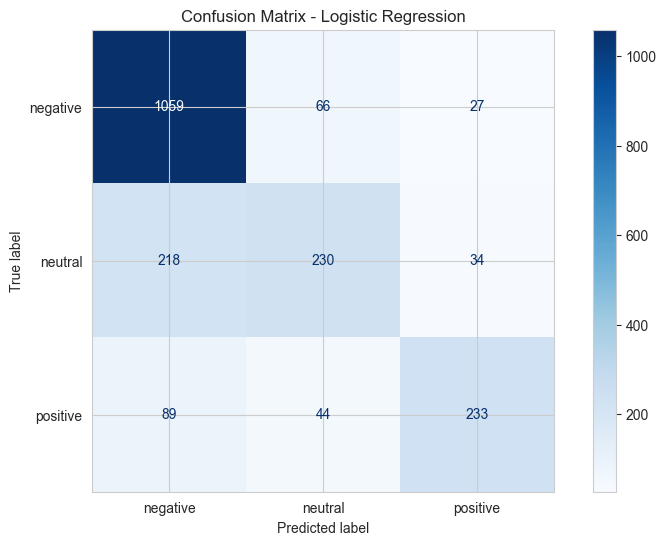

In [ ]:
# Plot confusion matrix for Logistic Regression
# YOUR CODE HERE

# Hint:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### 📊 Interpretation: Logistic Regression

*Analyze the results:*

1. **Overall performance**: 
The Logistic Regression model performed great, with a weighted f1 score of approximately 70% and an accuracy score of 76%
2. **Strengths**: 
The model did an excellent job at predicting negative classes achieving 92% on its recall. It got 1059 out of 1152 correct on predicting negative sentiments that were actually negative.
3. **Weaknesses**: 
The model faces challenges with neutral classes achieving a disappointing recall of 48%. It found only 230 out of 482 neutral classes
4. **Confusion matrix insights**: 
A very high number of misclassified tweets on Positive and Neutral shows a significant bias towards the negative class.

## Evaluate Model 2: Naive Bayes

In [ ]:
# Calculate metrics for Naive Bayes
# YOUR CODE HERE

# Follow the same pattern as above
accuracy = accuracy_score(y_test, y_pred_nb)
acc_nb = accuracy
recall = recall_score(y_test, y_pred_nb, average='weighted')
rec_nb = recall
precision = precision_score(y_test, y_pred_nb, average='weighted')
prec_nb = precision
f1 = f1_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1

print("=" * 50)
print("NAIVE BAYES RESULTS")
print("=" * 50)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\n")


print("="*10 + " Classification Report " + "="*10)
print(classification_report(y_test, y_pred_nb))


NAIVE BAYES RESULTS
Accuracy:  0.7055
Precision: 0.7263
Recall:    0.7055
F1-Score:  0.6638


========== Classification Report ==========
              precision    recall  f1-score   support

    negative       0.69      0.98      0.81      1152
     neutral       0.73      0.28      0.40       482
    positive       0.84      0.41      0.55       366

    accuracy                           0.71      2000
   macro avg       0.75      0.56      0.59      2000
weighted avg       0.73      0.71      0.66      2000



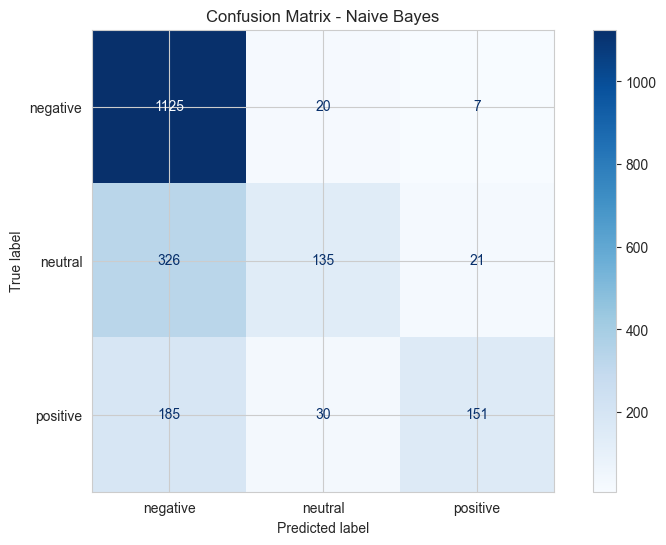

In [163]:
# Plot confusion matrix for Naive Bayes
# YOUR CODE HERE

cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

### 📊 Interpretation: Naive Bayes

*Analyze the results:*

1. **Overall performance**: 
The Naive Bayes model is slightly weaker, with a weighted F1-Score of approximately 58% and an accuracy score of 71%
2. **Strengths**: 
: It is nearly perfect at finding negative tweets at an amazing 98%. Which means, It is very cautious about labeling a tweet anything other than negative.
3. **Weaknesses**:
 The performance on minority classes is poor extremely poor, especially Neutral class with a recall of only 28%. 
4. **Confusion matrix insights**: 
The matrix shows an a more extreme bias toward the Negative classcompared to Logistic Regression, out of 848 records,
it classified 511 as negative whiles they were either positive or neutral. That is really poor.

## Evaluate Model 3 (Optional)

In [186]:
# Calculate metrics for your third model (if applicable)
print("=" * 50)
print("RANDOM FOREST CLASSIFIER RESULTS")
print("=" * 50)

# Follow the same pattern as above
accuracy = accuracy_score(y_test, y_pred_rf)
acc_rf = accuracy
recall = recall_score(y_test, y_pred_rf, average='weighted')
rec_rf = recall
precision = precision_score(y_test, y_pred_rf, average='weighted')
prec_rf = precision
f1 = f1_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1



print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\n")


print("="*10 + " Classification Report " + "="*10)
print(classification_report(y_test, y_pred_rf))

RANDOM FOREST CLASSIFIER RESULTS
Accuracy:  0.6040
Precision: 0.6874
Recall:    0.6040
F1-Score:  0.4850


========== Classification Report ==========
              precision    recall  f1-score   support

    negative       0.60      1.00      0.75      1152
     neutral       0.73      0.05      0.09       482
    positive       0.93      0.10      0.18       366

    accuracy                           0.60      2000
   macro avg       0.75      0.38      0.34      2000
weighted avg       0.69      0.60      0.48      2000



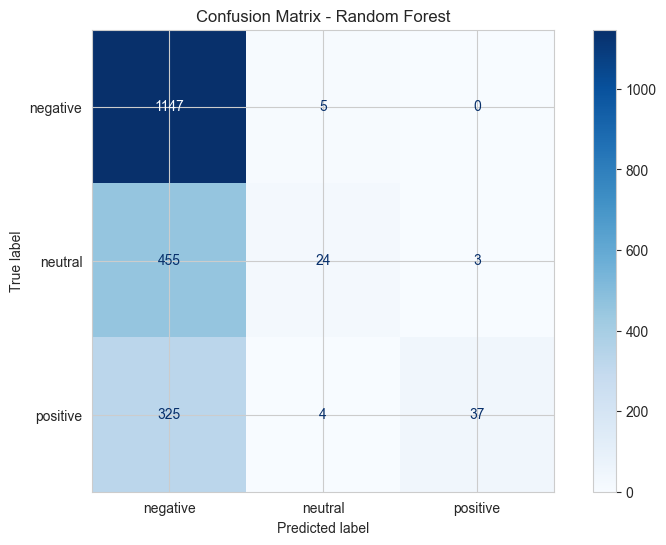

In [183]:
# Plot confusion matrix for your third model (if applicable)
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()


### 📊 Interpretation: Naive Bayes

*Analyze the results:*

1. **Overall performance**: 
The Random Forest model is the weakest overall, with a weighted F1-Score of approximately 34% and an accuracy score of 60%
2. **Strengths**: 
The model is perfect at finding negative tweets. Out of all the tweets that were truly negative, the model correctly identified all of them.
3. **Weaknesses**:
 The model is almost completely ineffective at identifying the Neutral and Positive classes. It failed totally at generalization and keep guessing "Negative" 
4. **Confusion matrix insights**: 
The model achieves 100% Negative Recall by classifying nearly all Neutral and Positive test samples as Negative False Negatives for Neutral/Positive
This behavior is actually worse than a simple Naive Bayes baseline.

## Model Comparison

In [187]:
# Create a comparison table of all models
# YOUR CODE HERE

# Hint: Create a pandas DataFrame with model names and their metrics
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [acc_lr, acc_nb, acc_rf],
    'Precision': [prec_lr, prec_nb, prec_rf],
    'Recall': [rec_lr, rec_nb, rec_rf],
    'F1-Score': [f1_lr, f1_nb, f1_rf]
})
display(results)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.7610,0.754608,0.7610,0.748574
1,Naive Bayes,0.7055,0.726327,0.7055,0.484964
2,Random Forest,0.6040,0.687398,0.6040,0.484964


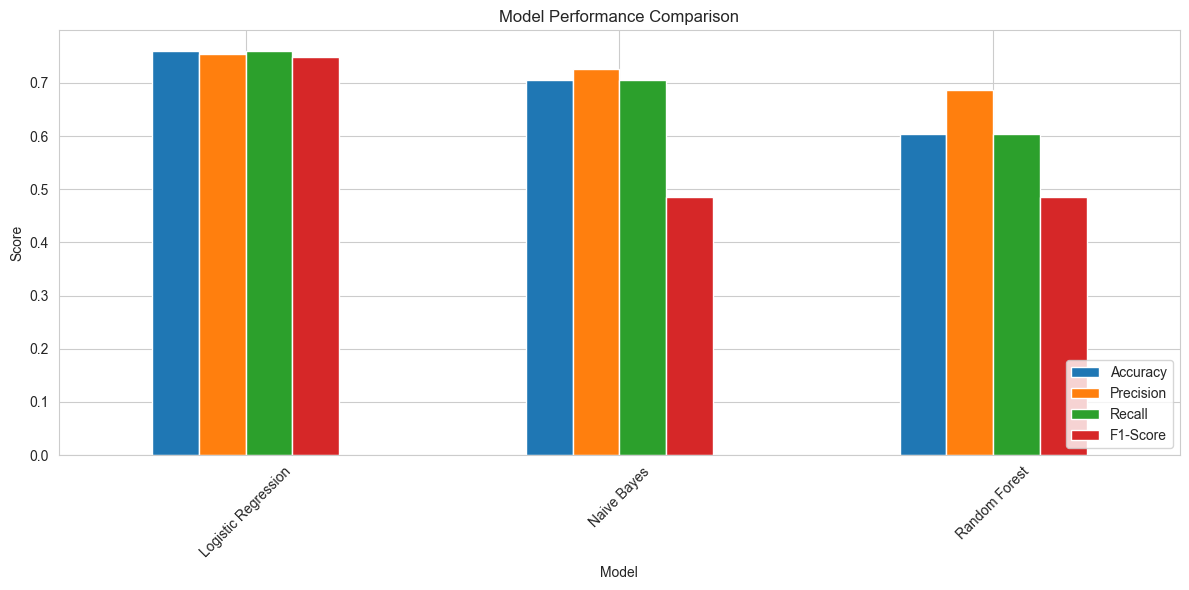

In [188]:
# Visualize model comparison
# YOUR CODE HERE

# Hint: Create a bar plot comparing metrics across models
results.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### 📊 Model Comparison Analysis

*Compare and contrast your models:*

1. **Which model performed best?**: 
Based  on the overall predictive quality using the Weighted F1-Score, the Logistic Regression model performed the best
2. **What metrics did you prioritize and why?**: 
We prioritized F1-Score and Recall for the Negative Class due to the nature of the data and the business problem.
F1 Score is the primary metric because it is the harmonic mean of Precision and Recall and is the best single metric for evaluating performance on an imbalanced multi-class dataset like the one in this sentiment analysis. It gives a realistic view of the model's overall predictive power, penalizing poor performance on minority classes
3. **Trade-offs between models**: 
The comparison of the three models reveals a clear trade-off between speed, complexity, and stability. The Naive Bayes model offers the greatest speed with near-instantaneous training, but this speed comes at the cost of severe bias toward the majority Negative class, rendering its predictions for Neutral and Positive sentiment almost useless. The Logistic Regression model provides the best balance; it is still very fast, offers strong, generalized performance across all classes, and, importantly, is interpretable by revealing the direct influence of keywords. In contrast, the more complex, non-linear Random Forest Classifier which was expected to capture subtle patterns—failed catastrophically in this instance. Its poor F1-Score  demonstrated severe overfitting to the class imbalance, proving that increased complexity does not always lead to better reliability, and ultimately making the Logistic Regression model the most robust choice.
4. **Which model would you recommend for deployment?**: 
Logistic Regression offers the best trade-off between speed and performance. Its F1-Score is high enough to be useful, and its training time is negligible, making it easy to retrain weekly or monthly on new data. I would recommend LR for deployment

## Error Analysis (Optional but Recommended)

In [190]:
# Analyze misclassified examples
# YOUR CODE HERE

# Hint: Find examples where the model was wrong
misclassified_indices = np.where(y_pred_lr != y_test)[0]
print(f"Number of misclassified examples: {len(misclassified_indices)}")

# Display some misclassified examples
for idx in misclassified_indices[:5]:
    print(f"\nText: {X_test.iloc[idx]}")
    print(f"True label: {y_test.iloc[idx]}")
    print(f"Predicted label: {y_pred_lr[idx]}")
    print("-" * 80)

Number of misclassified examples: 478

Text: download jeokoo the american app for air travelers
True label: neutral
Predicted label: negative
--------------------------------------------------------------------------------

Text: its almost like were punished for living near a large metro area ewr was top ranked for domestic delays not good
True label: negative
Predicted label: neutral
--------------------------------------------------------------------------------

Text: yes and not boarding at good luck with that push wheels up to reality dare you
True label: negative
Predicted label: neutral
--------------------------------------------------------------------------------

Text: “ our fleets on fleek smh yall expect me to trust a childish airline with my life nah
True label: negative
Predicted label: neutral
--------------------------------------------------------------------------------

Text: just left laguardia nowsunshine in a little over hours
True label: neutral
Predicted label

### 📊 Error Analysis Insights

*What patterns do you notice in the errors?*

1. **Common types of errors**: 
The most common error is False Negatives for the Neutral and Positive classes which happend across all three models. although some are worse than others.
2. **Why might these errors occur?**: 
These errors might be occuring simple because of class imbalance and overfitting. for example, Text: just left laguardia nowsunshine in a little over hours
True label: neutral
Predicted label: negative.
This could simply because there are too many negative classes that influence the decisions of the model.
3. **How could you improve the model?**: 
One approach is to do oversampling the minority class or undersampling the dominant class to achieve a balance. Also, feature engineering could be useful by adjusting n_gram value other than simply 2 words like "not good" to maybe 3 words to better understand the differences between negative and neutral.

---

# Part 6: Conclusion & Business Insights 💼

## Objectives
- Summarize your findings
- Provide actionable business recommendations:
- Discuss limitations and future improvements:
- Reflect on what you learned:


---

## 📝 Executive Summary

*Write a brief executive summary (3-5 sentences) for a non-technical audience:*
The project successfully applied machine learning techniques to classify customer sentiment from airline tweets into three categories of Negative, Neutral, and Positive.
EDA revealed a significant class imbalance with the negative class dominating while Neutral and Positive remain minority. I trained three different models, Naive Bayes, Random Forest and Logistic regression. I discovered that the performance differs between the three. However, taking the overall, Logistic regression performed best while Random Forest performed worst.

[Your summary here]

## 🎯 Key Findings

*List your main discoveries:*

1. **Dataset insights**: 
   - I trained with 10,000 records of data. however, there was a significant class imbalance, which was the central challenge of this project. Majority of tweets were classified as Negative, creating an inherent structural bias that simpler models naturally exploited and complex models struggled to overcome.

2. **Model performance**: 
   - The Logistic Regression model set the effective benchmark. It achieved the best balance in performance metrics, proving that a linear approach was sufficient and highly robust when trained on TF-IDF features
   The Random Forest Classifier (RFC) was an instructive failure. Its poor Weighted F1-Score of was a clear symptom of a deeper problem. the model used its complexity to overfit the structural bias of the training data, leading to its inability to generalize and correctly identify Positive and Neutral sentiments

3. **Best model and why**: 
   - Best Model: The Logistic Regression (LR) model.
   I will recommending the LR not just because it had the highest balanced F1-Score, but because of its practical utility and interpretability. In a business environment, the ability to look at the LR's weights and confidently state, "These are the exact words driving negative sentiment," is more valuable than a marginal F1-Score increase from an uninterpretable model. The LR is robust, fast, and provides immediate, actionable business intelligence.

4. **Surprising discoveries**: 
   - The most surprising discovery was how effectively the class imbalance broke the complex Random Forest model. My anticipation was a slight boost in performance from the RFC; instead, the model collapsed into an overly biased classifier that defaulted to guessing "Negative," confirming the dangers of applying high-variance models without proper balancing techniques.

## 💼 Business Recommendations

*How can these results be used in practice?*

1. **Immediate applications**: 
   - Deploy the Logistic Regression (LR) model to automatically classify all incoming airline tweets. Any tweet identified as Negative should be immediately flagged, prioritized, and routed to the customer service team for a rapid response. This helps the Airline protect their business reputation and customer retention.
   - Use the LR model's sentiment scores to create a daily or weekly dashboard that tracks sentiment trends across specific operational categories to allows managers to see the sentiment impact of recent operational changes or events

2. **Who should use this model?**: 
   - Social Media and Customer Service Team can use this model. I will help them to filter and prioritize, ensuring genuine complaints are not overlooked.
   - Marketing & Public Relations can also use this model as it will enable them to monitor the overall sentiment score and track the effectiveness of PR campaigns or service changes. A drop in the Neutral score, for instance, might signal that marketing messages are becoming too ambiguous

3. **How to interpret predictions**: 
   - Negative Prediction: Treat this as a Critical Alert. The management must respond quickly. The high Recall for the Negative class means the model is excellent at catching actual complaints, minimizing the risk of missing a customer service issue
   - Positive Prediction: Treat this as Marketing Strategy. These tweets can be used by the PR team for testimonial use or to identify successful aspects of the service.
   - Neutral Prediction: Treat this as a Probing Opportunity. Since the model struggled with this class, don't ignore it. Use Neutral predictions to proactively ask the customer a follow-up question and to gather more detailed, high-quality feedback.

4. **Warning signs to watch for**: 
   - Inconsistent Data Types and Data Quality: Watch for large amounts of non-text data such as, images and emojis that the current TF-IDF model cannot process. 
   - Drift in Neutral Recall: The model's ability to classify Neutral tweets is the weakest point. A significant drop in the Neutral Recall metric over time indicates the model is struggling to keep up with new, ambiguous forms of speech (e.g., new slang or sarcasm) and needs to be retrained

## ⚠️ Limitations

*Be honest about the limitations of your analysis:*

1. **Data limitations**: 
   - Unbalanced Labels is the major limitation: The project's most significant challenge was the severe class imbalance, with Negative tweets overwhelming the dataset.
   - The data is confined entirely to airline feedback. The model's vocabulary and learned sentiment patterns are highly specific to this domain words like 'gate', 'crew' are dominante and would not generalize well to other areas, such as product reviews or financial news, without significant retraining

2. **Model limitations**: 
   - Lack of Semantic Understanding for TF-IDF: The use of TF-IDF vectorizer means the model operates on the assumption that word frequency and importance are sufficient. It lacks genuine semantic understanding and cannot handle complex linguistic challenges.
   - The successful Logistic Regression model is inherently linear. It can only find simple additive relationships between keywords. While it proved robust, it will miss subtle, non-linear interactions between words that a successfully tuned, advanced model could capture

3. **Generalization concerns**: 
   - Geographical Bias: If the dataset predominantly reflects feedback from only a few major US hub airports, the model might be biased toward issues specific to those locations and may fail to generalize when applied to international routes or smaller regional airlines.
   - Temporal Drift: The model was trained on historical data. Customer language, airline policies, and common complaints change over time. It is critical to frequenctly monitor and retrain the model as and when human slags and vocabulary changes.

4. **Resource constraints**: 
   - Limited Hyperparameter Tuning: The project was tested on only specific algorithms and, as demonstrated, I was unable to perform the extensive, computationally heavy hyperparameter optimization that would be necessary to stabilize non-linear models.
   - No Deep Learning Baseline: Due to computational limits , I could not establish a baseline with state-of-the-art models like BERT or other Transformers. These models, while resource-intensive, would likely overcome the semantic and sequential limitations of othe current approach, potentially yielding a significantly higher performance..

## 🚀 Future Improvements

*What would you do with more time/resources?*

1. **Data collection**: 
   - Active Balanacing and Data Augmentation: Instead of passively accepting the imbalanced dataset, future work would incorporate a targeted data augmentation strategy, generating synthetic examples for the minority (Neutral and Positive) classes to fully resolve the structural bias
   - Enrich the dataset by collecting and including metadata features alongside the text, such as the number of followers the user has (a measure of influence), the tweet's location (airport code), and the time of day. This would allow the model to link sentiment not just to words, but to causal operational factors

2. **Feature engineering**: 
   - N-gram Expansion with Filtering: I woulc push the N-grams (word pairs and triples) further, but selectively. Instead of using all bi-grams, I can focus on finding the most predictive ones, like "terrible service" or "never again," which carry complex sentiment that single words miss.
   - We need to explicitly teach the model about strong sentiment. This means creating a domain-specific dictionary of negative and positive airline words and adding specific features to flag when negation is present

3. **Advanced models**: 
   - Transformer Models like BERT can be the most essential next step. These models read text sequentially, understanding words based on their context

4. **Deployment considerations**: 
   - We need to migrate the model out of the notebook and into a hosted environment like Google Cloud or AWS using a lightweight API framework like FastAPI. This allows the model to score tweets in real-time without crashing the system under heavy load.
   - Automated Retraining Pipeline should be implemented to reduce human efforts as our data grows.

## 🎓 Lessons Learned

*Reflect on your experience:*

1. **Technical skills gained**: 
   - Moving beyond simple word counts to implement and tune the TfidfVectorizer correctly, including critical memory-saving techniques like setting the max_features parameter.
   - Gaining a critical understanding of why metrics like Weighted F1-Score are necessary over simple Accuracy when dealing with structural class imbalance, which is a practical reality in every real-world dataset.

2. **Challenges overcome**: 
   - The initial thought was that a more advanced model must perform better. The challenge was moving past the initial surprise of the low F1-Score and using the error analysis to determine why it failed
   - The initial thought was that a more advanced model must perform better. The challenge was moving past the initial surprise of the low F1-Score and using the error analysis to determine why it failed.

3. **What would you do differently?**: 
   - I would spend less time training the baseline models and more time implementing a fix for the class imbalance before training. I will consider oversampling techniques for minority classes.
   - I would also use a much shallower max_depth like 5 or 8 for the Random Forest model from the start. This would have forced the model to generalize better and prevented the severe overfitting that plagued the initial attempt.

4. **Most valuable insight**: 
   - The Logistic Regression model was the project's true success story. Despite being a mathematically simple linear model, its high stability and interpretability allowed it to handle the imbalanced, noisy real-world data far more effectively than the complex, models like Random Forest. This confirms that in practical machine learning, the goal isn't just to achieve the highest accuracy or F1-Score but to build the most reliable, efficient, and transparent tool for the business problem at hand.

---

## 🎉 Congratulations!

You've completed the sentiment analysis project! Remember to:

- ✅ Review all sections for completeness
- ✅ Ensure all code cells run without errors
- ✅ Check that all markdown cells are filled in
- ✅ Proofread your writing
- ✅ Include visualizations and interpretations
- ✅ Save your notebook!

---

### 📚 Additional Resources

- [Scikit-learn Documentation](https://scikit-learn.org/)
- [TF-IDF Explained](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
- [Confusion Matrix Guide](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Text Preprocessing Best Practices](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

---

*Good luck with your project! 🚀*